In [132]:
#pip install requests beautifulsoup4

In [2]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.flipkart.com/search?q=mi%20mobiles%20mobile&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'  # Replace with the URL of the website you want to scrape
req = requests.get(url)



In [3]:
content=BeautifulSoup(req.content,'html.parser')

In [4]:
name=content.find_all('div',{'class':"_4rR01T"})
selling_price=content.find_all('div',{'class':"_30jeq3 _1_WHN1"})
cost_price=content.find_all('div',{'class':"_3I9_wc _27UcVY"})
description=content.find_all('div',{'class':"fMghEO"})

In [5]:
nm=[]
sel=[]
cs=[]
des=[]

In [6]:
for i in name:
    nm.append(i.text)
for i in selling_price:
    sel.append(i.text)
for i in cost_price:
    cs.append(i.text)

In [7]:
data={ 'name':nm,'selling_prc':sel,'cost_prc':cs}

In [8]:
import pandas as pd

In [9]:
data['name']

['realme C53 (Champion Black, 128 GB)',
 'POCO X5 Pro 5G (Horizon Blue, 128 GB)',
 'REDMI 10 Power (Power Black, 128 GB)',
 'REDMI 10 Power (Power Black, 128 GB)',
 'Mi 11 Lite (Vinyl Black, 128 GB)',
 'REDMI Note 11T 5G (Stardust White, 64 GB)',
 'Xiaomi 11i Hypercharge 5G (Purple Mist, 128 GB)',
 'POCO X5 Pro 5G (Astral Black, 256 GB)',
 'Redmi 6 (Black, 64 GB)',
 'Redmi Note 7S (Onyx Black, 64 GB)',
 'POCO X5 Pro 5G (Horizon Blue, 256 GB)',
 'POCO X5 Pro 5G (Astral Black, 128 GB)',
 'Xiaomi 11i 5G (Purple Mist, 128 GB)',
 'Xiaomi 11i Hypercharge 5G (Stealth Black, 128 GB)',
 'Xiaomi 12 Pro 5G (Noir Black, 256 GB)',
 'REDMI Note 11 Pro (Phantom White, 128 GB)',
 'POCO X5 Pro 5G (Yellow, 256 GB)',
 'POCO X5 Pro 5G (Yellow, 128 GB)',
 'REDMI Note 11 Pro (Star Blue, 128 GB)',
 'Mi A2 (Lake Blue, 128 GB)',
 'REDMI Note 11 Pro (Phantom White, 128 GB)',
 'Mi 10i (Atlantic Blue, 128 GB)',
 'Redmi 10 Prime (Astral White, 64 GB)',
 'Xiaomi 11i Hypercharge 5G (Pacific Pearl, 128 GB)']

In [10]:
df=pd.DataFrame(data)

In [11]:
df.head()

,name,selling_prc,cost_prc
0,"realme C53 (Champion Black, 128 GB)","₹10,999","₹13,999"
1,"POCO X5 Pro 5G (Horizon Blue, 128 GB)","₹18,499","₹25,999"
2,"REDMI 10 Power (Power Black, 128 GB)","₹11,100","₹18,999"
3,"REDMI 10 Power (Power Black, 128 GB)","₹11,108","₹18,999"
4,"Mi 11 Lite (Vinyl Black, 128 GB)","₹15,999","₹25,999"


In [12]:
df['name_parts']=df['name'].str.split('(',)

In [13]:
df['Name']=df['name_parts'].str[0]

In [14]:
df['name_parts']=df['Name']

In [15]:
df['model']=df['name'].str.split('(',)

In [16]:
#df['colour']=df['']

In [17]:
#df['colour'].split(',')`

In [26]:
df['model'][1]

['POCO X5 Pro 5G ', 'Horizon Blue, 128 GB)']

In [35]:
df['colour']=df['model'].str[1]

In [36]:
df.head()

,name,selling_prc,cost_prc,name_parts,Name,model,colour
0,"realme C53 (Champion Black, 128 GB)","₹10,999","₹13,999",realme C53,realme C53,"[realme C53 , Champion Black, 128 GB)]","Champion Black, 128 GB)"
1,"POCO X5 Pro 5G (Horizon Blue, 128 GB)","₹18,499","₹25,999",POCO X5 Pro 5G,POCO X5 Pro 5G,"[POCO X5 Pro 5G , Horizon Blue, 128 GB)]","Horizon Blue, 128 GB)"
2,"REDMI 10 Power (Power Black, 128 GB)","₹11,100","₹18,999",REDMI 10 Power,REDMI 10 Power,"[REDMI 10 Power , Power Black, 128 GB)]","Power Black, 128 GB)"
3,"REDMI 10 Power (Power Black, 128 GB)","₹11,108","₹18,999",REDMI 10 Power,REDMI 10 Power,"[REDMI 10 Power , Power Black, 128 GB)]","Power Black, 128 GB)"
4,"Mi 11 Lite (Vinyl Black, 128 GB)","₹15,999","₹25,999",Mi 11 Lite,Mi 11 Lite,"[Mi 11 Lite , Vinyl Black, 128 GB)]","Vinyl Black, 128 GB)"


In [45]:
df['colour']=df['colour'].str.strip(')')

In [46]:
df

,name,selling_prc,cost_prc,name_parts,Name,model,colour
0,"realme C53 (Champion Black, 128 GB)","₹10,999","₹13,999",realme C53,realme C53,"[realme C53 , Champion Black, 128 GB)]","Champion Black, 128 GB"
1,"POCO X5 Pro 5G (Horizon Blue, 128 GB)","₹18,499","₹25,999",POCO X5 Pro 5G,POCO X5 Pro 5G,"[POCO X5 Pro 5G , Horizon Blue, 128 GB)]","Horizon Blue, 128 GB"
2,"REDMI 10 Power (Power Black, 128 GB)","₹11,100","₹18,999",REDMI 10 Power,REDMI 10 Power,"[REDMI 10 Power , Power Black, 128 GB)]","Power Black, 128 GB"
3,"REDMI 10 Power (Power Black, 128 GB)","₹11,108","₹18,999",REDMI 10 Power,REDMI 10 Power,"[REDMI 10 Power , Power Black, 128 GB)]","Power Black, 128 GB"
4,"Mi 11 Lite (Vinyl Black, 128 GB)","₹15,999","₹25,999",Mi 11 Lite,Mi 11 Lite,"[Mi 11 Lite , Vinyl Black, 128 GB)]","Vinyl Black, 128 GB"
5,"REDMI Note 11T 5G (Stardust White, 64 GB)","₹15,619","₹18,999",REDMI Note 11T 5G,REDMI Note 11T 5G,"[REDMI Note 11T 5G , Stardust White, 64 GB)]","Stardust White, 64 GB"
6,"Xiaomi 11i Hypercharge 5G (Purple Mist, 128 GB)","₹21,899","₹33,999",Xiaomi 11i Hypercharge 5G,Xiaomi 11i Hypercharge 5G,"[Xiaomi 11i Hypercharge 5G , Purple Mist, 128 ...","Purple Mist, 128 GB"
7,"POCO X5 Pro 5G (Astral Black, 256 GB)","₹19,499","₹28,999",POCO X5 Pro 5G,POCO X5 Pro 5G,"[POCO X5 Pro 5G , Astral Black, 256 GB)]","Astral Black, 256 GB"
8,"Redmi 6 (Black, 64 GB)","₹8,999","₹10,499",Redmi 6,Redmi 6,"[Redmi 6 , Black, 64 GB)]","Black, 64 GB"
9,"Redmi Note 7S (Onyx Black, 64 GB)","₹10,898","₹13,999",Redmi Note 7S,Redmi Note 7S,"[Redmi Note 7S , Onyx Black, 64 GB)]","Onyx Black, 64 GB"


In [53]:
df['storage_c']=df['colour'].str.split(',')

In [54]:
df

,name,selling_prc,cost_prc,name_parts,Name,model,colour,storage,storage_c
0,"realme C53 (Champion Black, 128 GB)","₹10,999","₹13,999",realme C53,realme C53,"[realme C53 , Champion Black, 128 GB)]","Champion Black, 128 GB",128 GB,"[Champion Black, 128 GB]"
1,"POCO X5 Pro 5G (Horizon Blue, 128 GB)","₹18,499","₹25,999",POCO X5 Pro 5G,POCO X5 Pro 5G,"[POCO X5 Pro 5G , Horizon Blue, 128 GB)]","Horizon Blue, 128 GB",128 GB,"[Horizon Blue, 128 GB]"
2,"REDMI 10 Power (Power Black, 128 GB)","₹11,100","₹18,999",REDMI 10 Power,REDMI 10 Power,"[REDMI 10 Power , Power Black, 128 GB)]","Power Black, 128 GB",128 GB,"[Power Black, 128 GB]"
3,"REDMI 10 Power (Power Black, 128 GB)","₹11,108","₹18,999",REDMI 10 Power,REDMI 10 Power,"[REDMI 10 Power , Power Black, 128 GB)]","Power Black, 128 GB",128 GB,"[Power Black, 128 GB]"
4,"Mi 11 Lite (Vinyl Black, 128 GB)","₹15,999","₹25,999",Mi 11 Lite,Mi 11 Lite,"[Mi 11 Lite , Vinyl Black, 128 GB)]","Vinyl Black, 128 GB",128 GB,"[Vinyl Black, 128 GB]"
5,"REDMI Note 11T 5G (Stardust White, 64 GB)","₹15,619","₹18,999",REDMI Note 11T 5G,REDMI Note 11T 5G,"[REDMI Note 11T 5G , Stardust White, 64 GB)]","Stardust White, 64 GB",64 GB,"[Stardust White, 64 GB]"
6,"Xiaomi 11i Hypercharge 5G (Purple Mist, 128 GB)","₹21,899","₹33,999",Xiaomi 11i Hypercharge 5G,Xiaomi 11i Hypercharge 5G,"[Xiaomi 11i Hypercharge 5G , Purple Mist, 128 ...","Purple Mist, 128 GB",128 GB,"[Purple Mist, 128 GB]"
7,"POCO X5 Pro 5G (Astral Black, 256 GB)","₹19,499","₹28,999",POCO X5 Pro 5G,POCO X5 Pro 5G,"[POCO X5 Pro 5G , Astral Black, 256 GB)]","Astral Black, 256 GB",256 GB,"[Astral Black, 256 GB]"
8,"Redmi 6 (Black, 64 GB)","₹8,999","₹10,499",Redmi 6,Redmi 6,"[Redmi 6 , Black, 64 GB)]","Black, 64 GB",64 GB,"[Black, 64 GB]"
9,"Redmi Note 7S (Onyx Black, 64 GB)","₹10,898","₹13,999",Redmi Note 7S,Redmi Note 7S,"[Redmi Note 7S , Onyx Black, 64 GB)]","Onyx Black, 64 GB",64 GB,"[Onyx Black, 64 GB]"


In [56]:
df['storage']=df['storage_c'].str[1]

In [58]:
df['colour']=df['storage_c'].str[0]

In [59]:
df

,name,selling_prc,cost_prc,name_parts,Name,model,colour,storage,storage_c
0,"realme C53 (Champion Black, 128 GB)","₹10,999","₹13,999",realme C53,realme C53,"[realme C53 , Champion Black, 128 GB)]",Champion Black,128 GB,"[Champion Black, 128 GB]"
1,"POCO X5 Pro 5G (Horizon Blue, 128 GB)","₹18,499","₹25,999",POCO X5 Pro 5G,POCO X5 Pro 5G,"[POCO X5 Pro 5G , Horizon Blue, 128 GB)]",Horizon Blue,128 GB,"[Horizon Blue, 128 GB]"
2,"REDMI 10 Power (Power Black, 128 GB)","₹11,100","₹18,999",REDMI 10 Power,REDMI 10 Power,"[REDMI 10 Power , Power Black, 128 GB)]",Power Black,128 GB,"[Power Black, 128 GB]"
3,"REDMI 10 Power (Power Black, 128 GB)","₹11,108","₹18,999",REDMI 10 Power,REDMI 10 Power,"[REDMI 10 Power , Power Black, 128 GB)]",Power Black,128 GB,"[Power Black, 128 GB]"
4,"Mi 11 Lite (Vinyl Black, 128 GB)","₹15,999","₹25,999",Mi 11 Lite,Mi 11 Lite,"[Mi 11 Lite , Vinyl Black, 128 GB)]",Vinyl Black,128 GB,"[Vinyl Black, 128 GB]"
5,"REDMI Note 11T 5G (Stardust White, 64 GB)","₹15,619","₹18,999",REDMI Note 11T 5G,REDMI Note 11T 5G,"[REDMI Note 11T 5G , Stardust White, 64 GB)]",Stardust White,64 GB,"[Stardust White, 64 GB]"
6,"Xiaomi 11i Hypercharge 5G (Purple Mist, 128 GB)","₹21,899","₹33,999",Xiaomi 11i Hypercharge 5G,Xiaomi 11i Hypercharge 5G,"[Xiaomi 11i Hypercharge 5G , Purple Mist, 128 ...",Purple Mist,128 GB,"[Purple Mist, 128 GB]"
7,"POCO X5 Pro 5G (Astral Black, 256 GB)","₹19,499","₹28,999",POCO X5 Pro 5G,POCO X5 Pro 5G,"[POCO X5 Pro 5G , Astral Black, 256 GB)]",Astral Black,256 GB,"[Astral Black, 256 GB]"
8,"Redmi 6 (Black, 64 GB)","₹8,999","₹10,499",Redmi 6,Redmi 6,"[Redmi 6 , Black, 64 GB)]",Black,64 GB,"[Black, 64 GB]"
9,"Redmi Note 7S (Onyx Black, 64 GB)","₹10,898","₹13,999",Redmi Note 7S,Redmi Note 7S,"[Redmi Note 7S , Onyx Black, 64 GB)]",Onyx Black,64 GB,"[Onyx Black, 64 GB]"


In [93]:
df2=df.drop(['name','name_parts','model','storage_c'],axis=1)

In [92]:
df.isnull().value_counts()

name   selling_prc  cost_prc  name_parts  Name   model  colour  storage  storage_c  mnop
False  False        False     False       False  False  False   False    False      True    24
Name: count, dtype: int64

In [95]:
df2.head()

,selling_prc,cost_prc,Name,colour,storage,mnop
0,"₹10,999","₹13,999",realme C53,Champion Black,128 GB,NaN
1,"₹18,499","₹25,999",POCO X5 Pro 5G,Horizon Blue,128 GB,NaN
2,"₹11,100","₹18,999",REDMI 10 Power,Power Black,128 GB,NaN
3,"₹11,108","₹18,999",REDMI 10 Power,Power Black,128 GB,NaN
4,"₹15,999","₹25,999",Mi 11 Lite,Vinyl Black,128 GB,NaN


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Name'>

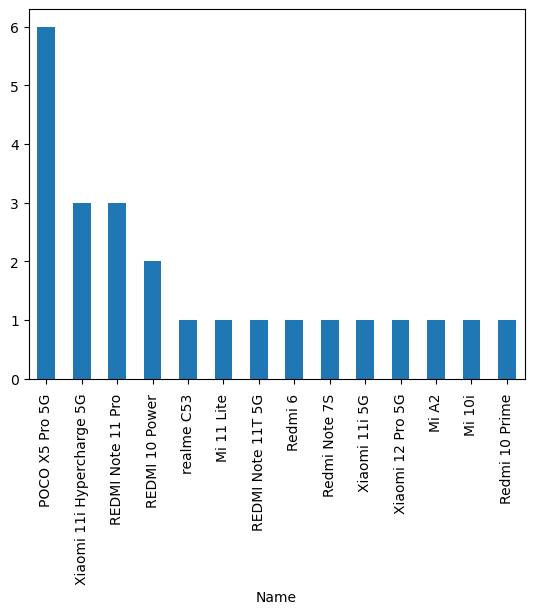

In [119]:
df['Name'].value_counts().plot(kind='bar')

In [134]:
df2[df2['Name']=="readmi10prime"]

,selling_prc,cost_prc,Name,colour,storage,mnop


In [129]:
df2['Name']=df2['Name'].str.replace(' ','')